In [3]:
%load_ext autoreload
%autoreload 2
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
# ensure is in parent directory
try:
    print(os.getcwd())
    os.chdir("../../rug-hr/")
    print(os.getcwd())
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\mo\Documents\Organisations\RUG\rug-hr


Predicting ./datasets/IAM-data/img\c03-094c-03.png
torch.Size([2, 128, 1705])
(63, 852)


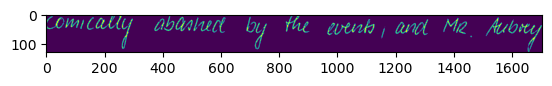

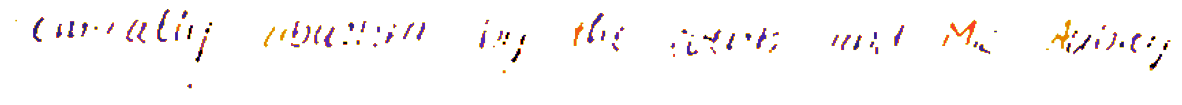

(63, 852) 25 labels are present
 E o m m m i c a l lI ly yYy A A b b a a w m h h h e d d b b bIy y H h e e e li ve n n hf Hhf a a n nd d M Mk k k A A iru b b r e y yr 


In [4]:
from modules.iam import SegLMIAM
from modules.iam.postprocessing import transcribe_image
from modules.scripturize.utils.plot import show_labelled_manuscript
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

model = SegLMIAM().to(device)
model.load("./models/seglm-masked-v1-128x1024-iam.pt")

dataset_paths = glob("./datasets/IAM-data/img/*")
sample_path = np.random.choice(dataset_paths)

print("Predicting", sample_path)

predictions = model.predict(im_path=sample_path)
print(predictions.shape)

show_labelled_manuscript(predictions, interactive=False, random_crop_size=False)
plt.show()

transcription = transcribe_image(predictions)
print(transcription)
Image.fromarray(predictions.astype(np.int16)).save(f"./datasets/iam_outputs/{np.random.randint(0, 1000)}.png")